In [2]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [3]:
print(os.getcwd())

C:\Users\Manshi\Desktop\combine Razorpay


In [4]:
directory = r'C:\Users\Manshi\Desktop\combine Razorpay\\'
csv_files = [file for file in os.listdir(directory) if file.endswith('p.csv')]
csv_files

['April 23 p.csv',
 'Aug 22 p.csv',
 'dec 22 p.csv',
 'feb 23 p.csv',
 'Jan 23 p.csv',
 'july 22 p.csv',
 'june 23 p.csv',
 'march 23 p.csv',
 'may 23 p.csv',
 'Nov 22 p.csv',
 'oct 22 p.csv',
 'sept 22 p.csv']

In [5]:
combined_data = pd.DataFrame()
for files in csv_files:
    data=pd.read_csv(files)
    combined_data = pd.concat([combined_data,data],ignore_index=True)

In [6]:
directory = r'C:\Users\Manshi\Desktop\combine Razorpay\\'
csv_files = [file for file in os.listdir(directory) if file.endswith('orders.csv')]
csv_files

['april 2023 orders.csv',
 'aug 22 orders.csv',
 'dec 2022 orders.csv',
 'feb 2023 orders.csv',
 'jan 23 orders.csv',
 'july 22 orders.csv',
 'march 2023 orders.csv',
 'May 2023 orders.csv',
 'Nov 2022 orders.csv',
 'oct 2022 orders.csv',
 'sept 2022 orders.csv']

In [7]:
orders = pd.DataFrame()
for files in csv_files:
    data=pd.read_csv(files)
    orders = pd.concat([orders,data],ignore_index=True)

In [8]:
# df=pd.read_csv('may 2023.csv')
# orders=pd.read_csv('May orders 2023.csv')

In [9]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [10]:
combined_data

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id
0,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,Watermelon,155.0,1.0,155.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
1,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,MUSKMELON 1PC,135.0,1.0,135.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
2,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,DESI PAPAYA 1PC,100.0,2.0,200.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
3,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,ELAICHI BANANA 1DOZEN,118.0,1.0,118.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
4,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 20:15:54,order_LbjMO6E1YlnOoF,AVOCADOS 2 PCS,685.0,1.0,685.0,1935.0,INR,failed,pay_LbjMWLqLhpMohI
...,...,...,...,...,...,...,...,...,...,...,...,...
6338,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm
6339,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm
6340,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,pay_KMsK0vVFivSewT
6341,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,pay_KNZvbmKjqIktA4


In [11]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]


In [12]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [13]:
orders

,order_id,name,email
0,order_LYNixREtZ5yK9S,Kanchan,Samtani.kanchan@bcg.com
1,order_LYX61KR1NfQCKT,Sonavi Desai,sonavid@gmail.com
2,order_LYX7VqyBqc61HI,Sonavi Desai,sonavid@gmail.com
3,order_LYXuMMuY5pVnm9,Sonavi Desai,sonavid@gmail.com
4,order_LYnHqGt69fvok7,Meher Mirza,mehermirza123@gmail.com
...,...,...,...
1206,order_KNZrbTnOlpRCNl,Jasma Kapadia,jasmak999@yahoo.com
1207,order_KNZruF53reFCtW,Jasma Kapadia,jasmak999@yahoo.com
1208,order_KNZvIoQVGzGL9o,Amirbanu Virji,ajvirji@gmail.com
1209,order_KNy2q87jB125jD,NaN,NaN


In [14]:
orders.isnull().sum()

order_id     0
name        51
email       51
dtype: int64

In [15]:
combined_data[combined_data['order_id'].isnull()].groupby('item payment amount').sum().reset_index()

,item payment amount,item amount,item quantity,total payment amount
0,0.0,0.0,0.0,0.0


In [16]:
combined_data=pd.merge(combined_data,orders,on='order_id',how="left")

In [17]:
combined_data[combined_data['name'].isnull()]['order_id']

1489                     NaN
2237                     NaN
2822                     NaN
3249    order_LyW1wBiKD3zNrX
3250    order_LyW1wBiKD3zNrX
                ...         
5087    order_Lwys2qrNfCncTf
5099    order_LxjQZeDPofpyQH
5100    order_LxjQZeDPofpyQH
5101    order_LxjQZeDPofpyQH
5102    order_LxjQZeDPofpyQH
Name: order_id, Length: 267, dtype: object

In [18]:
combined_data[combined_data['name'].isnull()]['item payment amount'].sum()

55959.0

In [19]:
combined_data.isnull().sum()

payment page id           0
payment page title        0
payment date              6
order_id                  6
item name                 6
item amount               6
item quantity             6
item payment amount       0
total payment amount      6
currency                  6
payment status            6
payment id                6
name                    267
email                   267
dtype: int64

In [20]:
combined_data.dropna(subset=['order_id'],inplace=True)

In [21]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
3249,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,JAMUN 500G,400.0,1.0,400.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3250,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,AVOCADOS 2 PCS,600.0,1.0,600.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3251,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,PAPAYA 1PC,100.0,1.0,100.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3252,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,MUSKMELON 1PC,135.0,1.0,135.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3253,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,DELIVERY,15.0,1.0,15.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 13:05:14,order_Lwys2qrNfCncTf,HAPUS MANGOES 1DOZ,950.0,1.0,950.0,2295.0,INR,captured,pay_Lwys6fwwkJg9Ij,NaN,NaN
5099,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,MOSUMBI LOCAL 1kg,165.0,1.0,165.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
5100,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,KIWI BOX,200.0,1.0,200.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
5101,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,BLUEBERRIES 2 BOX,550.0,1.0,550.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN


In [22]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [23]:
combined_data_copy=combined_data.copy()

### checking unique values and their count in each columns

In [24]:
combined_data_copy['payment page id'].nunique()

187

In [25]:
combined_data_copy['payment page id'].value_counts()

pl_JwhO3HTiMTVyHX    123
pl_LjSEzj8c6pW6eg     92
pl_LgPq1hiWfh7uZE     88
pl_KGSvSXU36ZVMir     86
pl_K5QoMWpw63vMtn     86
                    ... 
pl_KteK7pELT57gIt      2
pl_KqX6FyOFgY4VZb      2
pl_M1Nv8PzDD98HbR      1
pl_LB4JApucSL4NEl      1
pl_KSVvJdQdjUzF8N      1
Name: payment page id, Length: 187, dtype: int64

In [26]:
combined_data_copy['payment page title'].nunique()

164

In [27]:
combined_data_copy['payment page title'].value_counts()

FRUIT BASKET AUGUST                        232
FRUIT BASKET JULY                          152
FRUIT BASKET OCTOBER                       139
FRUIT BASKET DAILY                         115
FRUIT BASKET DAILY SEPTEMBER               108
                                          ... 
HERBS & SALADS MARCH 25                      2
SALADS, EXOTIC VEGETABLES DEC 20             2
MALAWI MANGO MANIA                           2
DRYFRUITS, SEEDS, NUTS FEBRUARY 08           1
DRYFRUITS, SEEDS, NUTS. JUNE 14th-18 th      1
Name: payment page title, Length: 164, dtype: int64

In [28]:
combined_data_copy['order_id'].nunique()

1088

In [29]:
combined_data_copy['payment id'].nunique()

1177

In [30]:
df=combined_data_copy.groupby('order_id')['payment id'].first().reset_index()
combined_data_copy=pd.merge(combined_data_copy,df,on='order_id',how="left")

In [31]:
combined_data_copy['payment id']=combined_data_copy['payment id_y']
combined_data_copy.drop(columns=['payment id_x','payment id_y'],inplace=True)

In [32]:
combined_data_copy

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,name,email,payment id
0,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,Watermelon,155.0,1.0,155.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
1,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,MUSKMELON 1PC,135.0,1.0,135.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
2,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,DESI PAPAYA 1PC,100.0,2.0,200.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
3,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,ELAICHI BANANA 1DOZEN,118.0,1.0,118.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
4,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 20:15:54,order_LbjMO6E1YlnOoF,AVOCADOS 2 PCS,685.0,1.0,685.0,1935.0,INR,failed,Nisha singh,anish24@gmail.com,pay_LbjMWLqLhpMohI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,Jasma Kapadia,jasmak999@yahoo.com,pay_KNZs4UlODcdwbm
6333,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,Jasma Kapadia,jasmak999@yahoo.com,pay_KNZs4UlODcdwbm
6334,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,Leena Sivakumar,leena.sivakumar@gmail.com,pay_KMsK0vVFivSewT
6335,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,Amirbanu Virji,ajvirji@gmail.com,pay_KNZvbmKjqIktA4


In [33]:
# values_to_drop = ['pay_LUqE7lVkgOU9bH','pay_LUvsd49Yc5Itaz','pay_LXE2GgLFFZUL3l','pay_LZJWgSvAQc1gCS','pay_LZxtNQumNMNGY3','pay_LZxtUuQsPr4hEh']

# # Drop rows where Gender column has values in the list
# combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [34]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [35]:
combined_data_copy['item name'].unique()

array(['Watermelon', 'MUSKMELON 1PC', 'DESI PAPAYA 1PC',
       'ELAICHI BANANA 1DOZEN', 'AVOCADOS 2 PCS', 'HAPUS MANGOES 1DOZ',
       'FLAME RED GRAPES 1 KG', 'KIWI BOX', 'FIJI APPLES 1KG',
       'POMEGRANATE 1KG', 'PAIREE MANGOES 1 DOZ', 'CHICKOO 1KG',
       'REGULAR BANANA 1 DOZ', 'BLUEBERRIES 2 BOX', 'PEAR 1KG',
       'MOSUMBI LOCAL 1kg', 'MANDARIN MINI ORANGES 1KG',
       'RED YELLOW CAPSICUM 1PC', 'S LETTUCE MIX', 'PURPLE CABBAGE 1 PC',
       'DELIVERY', 'S ROMAINE', 'S SUMMERCRISP', 'ICEBERG LETTUCE 1 PC',
       'S BUTTERHEAD', 'JAPANESE CUCUMBER 500G', 'S ARAGULA',
       'BABY SPINACH', 'BUTTON WHITE MUSHROOM 2PACKS', 'BROCCOLI 1PC',
       'GREEN ZUCCHINI 1PC', 'YELLOW ZUCCHINI 1PC', 'Sweet Potato 500g',
       'Green Capsicum 500g', 'Ladies Finger 250g', 'Potatoes 1kg',
       'Cucumber White 500g', 'Dudhi', 'Cauliflower', 'French Beans 500g',
       'Drumsticks 250g', 'Cabbage', 'Tomatoes 1kg', 'Onions 1kg',
       'Brinjal Stripes Kateri 500g', 'Tendli 500g', 'Gavar

In [36]:
combined_data_copy['item name'].nunique()

218

In [37]:
combined_data_copy['name'].nunique()

238

In [38]:
combined_data_copy['payment status'].nunique()

2

In [39]:
combined_data_copy['payment status'].value_counts()

captured    4332
failed      2005
Name: payment status, dtype: int64

In [40]:
combined_data_copy.fillna('unknown',inplace=True)

In [41]:
combined_data_copy['name'].nunique()

239

In [42]:
combined_data_copy['email'].nunique()

126

In [43]:
combined_data_copy['name'].value_counts()

Indrani Jafar        444
Michelle Baptist     379
unknown              261
kanchan              244
Ruchi  Wahi          202
                    ... 
Puja                   1
Rachna Chattaram       1
Preeti Maria           1
Minu Agarwql           1
Viji Ram               1
Name: name, Length: 239, dtype: int64

In [44]:
combined_data_copy['currency'].value_counts()

INR    6337
Name: currency, dtype: int64

#### cheching null value count

In [45]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
name                         0
email                        0
payment id                   0
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [46]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [47]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    68.360423
failed      31.639577
Name: payment status, dtype: float64

In [48]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [49]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [50]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [51]:
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['order_id'].nunique()

46

In [52]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [53]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

herbs=combined_data_payment_completed['payment page title'].str.startswith('DAILY FRUIT')
combined_data_payment_completed.loc[herbs,'payment page title']='FRUIT BASKET'

In [99]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


FRUIT BASKET                 276
SALADS, EXOTIC VEGETABLES    215
DRYFRUITS, SEEDS, NUTS        50
Name: payment page title, dtype: int64

In [55]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [56]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [57]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [58]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [59]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [60]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [61]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [62]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [63]:
print("number of days for which we are performing our analysis")
combined_data_payment_completed['date'].min()

number of days for which we are performing our analysis


Timestamp('2022-07-01 00:00:00')

In [64]:
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['month']==9]

In [65]:
df = combined_data_payment_completed
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




display(df_grouped)


,name,email
0,abha mehta,abhamehta26@gmail.com
1,amirbanu virji,ajvirji@gmail.com
2,amita sinha,amita_sinha@yahoo.com
3,anubha,sawhney.anubha@gmail.com
4,arnaaz irani,mecra20@gmail.com
5,ashish billimoria,billimoriaash@gmail.com
6,brinda u,anish24@gmail.com
7,coleen,anish24@gmail.com
8,deepa harris,deepaharris@gmail.com
9,dilnaaz zaiwala,zaiwalad@gmail.com


In [83]:
row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'dinmeher  b'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'dinmeher'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'dinmehar'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'dinmeher'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'michelle b'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'michelle baptist'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'tanaaz'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'tanaaz rastomjee'



In [84]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [85]:
combined_data_payment_completed['name'].unique()

array(['mohyna srinivasan', 'deepa harris', 'kanchan', 'parul kumar',
       'sonavi desai', 'indrani jafar', 'priyanka taneja',
       'gitanjali anand', 'anubha', 'jasma kapadia', 'michelle baptist',
       'preeti rathod', 'meher mirza', 'ashish billimoria', 'abha mehta',
       'tanaaz rastomjee', 'rachna jain', 'naina', 'neetu', 'toral patel',
       'simeen oshidar', 'padmasree', 'arnaaz irani', 'trupti maskai',
       'dinmeher', 'mridula gupta', 'dilnaaz zaiwala', 'heeral akhaury',
       'shradha goenka', 'payal maheshwari', 'shwetha kallaje', 'viji',
       'somshukla d', 'yogesh thakkar', 'manisha', 'preeti maria',
       'brinda u', 'leena sivakumar', 'amita sinha', 'sreemanti',
       'rohini ganesh', 'sunaina v', 'coleen', 'amirbanu virji'],
      dtype=object)

In [88]:
combined_data_payment_completed.groupby('name')['email'].unique().reset_index()

,name,email
0,abha mehta,[abhamehta26@gmail.com]
1,amirbanu virji,[ajvirji@gmail.com]
2,amita sinha,[amita_sinha@yahoo.com]
3,anubha,[sawhney.anubha@gmail.com]
4,arnaaz irani,[mecra20@gmail.com]
5,ashish billimoria,[billimoriaash@gmail.com]
6,brinda u,[anish24@gmail.com]
7,coleen,[anish24@gmail.com]
8,deepa harris,[deepaharris@gmail.com]
9,dilnaaz zaiwala,[zaiwalad@gmail.com]


In [87]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,indrani jafar,48
1,naina,44
2,jasma kapadia,38
3,neetu,38
4,parul kumar,30
5,michelle baptist,29
6,padmasree,26
7,gitanjali anand,25
8,dinmeher,20
9,sonavi desai,20


In [89]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
1,FRUIT BASKET,66982.0
0,"DRYFRUITS, SEEDS, NUTS",44135.0
2,"SALADS, EXOTIC VEGETABLES",28002.0


In [90]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
41,premium almonds 500g,11700.0,13.0
58,walnuts 500g,10395.0,9.0
27,mandarin small oranges 1kg,7040.0,22.0
2,avocados 2 pcs,6600.0,11.0
1,avanza avocados 2 pcs,6165.0,9.0
...,...,...,...
36,pineapple,495.0,3.0
4,babycorn 1pack,455.0,7.0
23,italian basil,360.0,4.0
55,s swiss chard,330.0,3.0


In [91]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent=df_most_recent.reset_index()
df_most_recent.drop(columns='index')

,name,email,Most_recent_Purchase_date,Number of days after Purchase
0,gitanjali anand,sangeeta@akinariwala.com,2022-09-30,0 days
1,jasma kapadia,jasmak999@yahoo.com,2022-09-29,1 days
2,amirbanu virji,ajvirji@gmail.com,2022-09-29,1 days
3,sonavi desai,sonavid@gmail.com,2022-09-28,2 days
4,michelle baptist,michbaptist@gmail.com,2022-09-27,3 days
5,anubha,sawhney.anubha@gmail.com,2022-09-27,3 days
6,leena sivakumar,leena.sivakumar@gmail.com,2022-09-27,3 days
7,padmasree,padmasree.r@gmail.com,2022-09-26,4 days
8,dinmeher,anish24@gmail.com,2022-09-26,4 days
9,sunaina v,anish24@gmail.com,2022-09-26,4 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

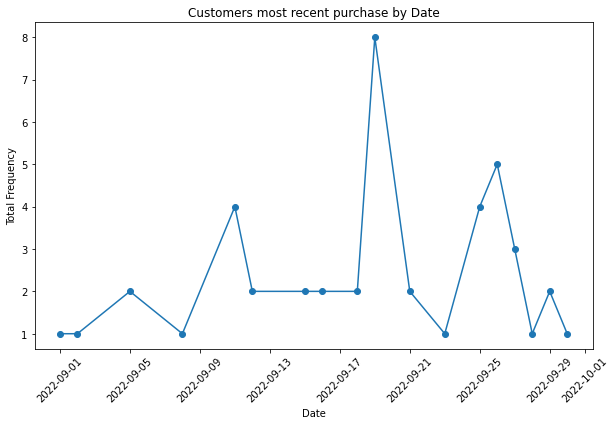

In [92]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [93]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame

df_oldest_date=df_oldest_date.reset_index()
df_oldest_date.drop(columns='index')

,name,email,oldest_Purchase_date
0,deepa harris,deepaharris@gmail.com,2022-09-01
1,mohyna srinivasan,mohynas@yahoo.com.hk,2022-09-02
2,indrani jafar,ani.doley@gmail.com,2022-09-02
3,sonavi desai,sonavid@gmail.com,2022-09-02
4,parul kumar,2014parulkumar@gmail.com,2022-09-02
5,kanchan,samtani.kanchan@bcg.com,2022-09-02
6,michelle baptist,michbaptist@gmail.com,2022-09-04
7,gitanjali anand,gma6567@gmail.com,2022-09-04
8,priyanka taneja,4priyankataneja@gmail.com,2022-09-04
9,anubha,sawhney.anubha@gmail.com,2022-09-04


In [94]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount

,name,item payment amount(INR)
0,jasma kapadia,14670.0
1,yogesh thakkar,8820.0
2,neetu,8735.0
3,michelle baptist,8590.0
4,naina,8043.0
5,indrani jafar,7905.0
6,parul kumar,6997.0
7,anubha,6570.0
8,priyanka taneja,6450.0
9,tanaaz rastomjee,5225.0


In [95]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
14,jasma kapadia,7
19,michelle baptist,6
22,naina,5
25,parul kumar,5
13,indrani jafar,5
10,dinmeher,4
0,abha mehta,4
39,tanaaz rastomjee,3
24,padmasree,3
3,anubha,3


In [96]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,jasma kapadia,7,14670.0,2095.0
1,yogesh thakkar,1,8820.0,8820.0
2,neetu,1,8735.0,8735.0
3,michelle baptist,6,8590.0,1431.0
4,naina,5,8043.0,1608.0
5,indrani jafar,5,7905.0,1581.0
6,parul kumar,5,6997.0,1399.0
7,anubha,3,6570.0,2190.0
8,priyanka taneja,2,6450.0,3225.0
9,tanaaz rastomjee,3,5225.0,1741.0


In [100]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,anubha,"DRYFRUITS, SEEDS, NUTS",3475.0
1,anubha,FRUIT BASKET,3095.0
2,indrani jafar,FRUIT BASKET,2830.0
3,indrani jafar,"SALADS, EXOTIC VEGETABLES",5075.0
4,jasma kapadia,"DRYFRUITS, SEEDS, NUTS",7950.0
5,jasma kapadia,FRUIT BASKET,4310.0
6,jasma kapadia,"SALADS, EXOTIC VEGETABLES",2410.0
7,michelle baptist,"DRYFRUITS, SEEDS, NUTS",3620.0
8,michelle baptist,FRUIT BASKET,4620.0
9,michelle baptist,"SALADS, EXOTIC VEGETABLES",350.0


In [101]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",Total Amount(INR)
0,jasma kapadia,7950.0,4310.0,2410.0,14670.0
1,yogesh thakkar,8820.0,0.0,0.0,8820.0
2,neetu,0.0,7500.0,1235.0,8735.0
3,michelle baptist,3620.0,4620.0,350.0,8590.0
4,naina,0.0,6948.0,1095.0,8043.0
5,indrani jafar,0.0,2830.0,5075.0,7905.0
6,parul kumar,0.0,6156.0,841.0,6997.0
7,anubha,3475.0,3095.0,0.0,6570.0
8,priyanka taneja,6450.0,0.0,0.0,6450.0
9,tanaaz rastomjee,0.0,5225.0,0.0,5225.0


In [102]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
#pivot_table_p['WEEKEND MIX FRUITS & EXOTICS(percentage) ']=round(pivot_table_p['WEEKEND MIX FRUITS & EXOTICS']*100/pivot_table_p['Total Amount(INR) '],2)

#pivot_table_p['HERBS & SALADS(percentage) ']=round(pivot_table_p['HERBS & SALADS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)"
0,jasma kapadia,14670.0,29.38,54.19,16.43
1,yogesh thakkar,8820.0,0.00,100.00,0.00
2,neetu,8735.0,85.86,0.00,14.14
3,michelle baptist,8590.0,53.78,42.14,4.07
4,naina,8043.0,86.39,0.00,13.61
5,indrani jafar,7905.0,35.80,0.00,64.20
6,parul kumar,6997.0,87.98,0.00,12.02
7,anubha,6570.0,47.11,52.89,0.00
8,priyanka taneja,6450.0,0.00,100.00,0.00
9,tanaaz rastomjee,5225.0,100.00,0.00,0.00


In [ ]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['VEGETABLES']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']+pivot_table_bottom['HERBS & SALADS']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

In [103]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,anubha,"[plum 500g, washington apples 1kg, mandarin small oranges 1kg, delivery, pear 1kg, pomegranate 1kg, gourmet black rasins 500g, premium almonds 500g, walnuts 500g, imported kiwi box, beauty pear 1k..."
1,indrani jafar,"[muskmelon 1pc, delivery, raipur guava 1kg, new zealand red apples 1kg, mandarin small oranges 1kg, yellow zucchini 1pc, green zucchini 1pc, avanza avocados 2 pcs, red yellow capsicum 1pc, japanes..."
2,jasma kapadia,"[pear 1kg, new zealand red apples 1kg, delivery, salted pista 500g, prunes 250g, walnuts 500g, premium almonds 500g, imported blueberries 2punnets, green zucchini 1pc, s aragula, avocados 2 pcs, b..."
3,michelle baptist,"[avanza avocados 2 pcs, indian apples 1kg, mandarin small oranges 1kg, delivery, regular banana 1 doz, desi papaya 1pc, red yellow capsicum 1pc, button white mushroom 2packs, babycorn 1pack, new z..."
4,naina,"[muskmelon 1pc, delivery, desi papaya 1pc, pomegranate 1kg, imported kiwi box, watermelon, avanza avocados 2 pcs, plum 500g, regular banana 1 doz, elaichi banana 1dozen, italian basil, button whit..."
5,neetu,"[desi papaya 1pc, sitafal 1kg, imported kiwi box, pomegranate 1kg, delivery, avanza avocados 2 pcs, muskmelon 1pc, blueberries 2 box, raipur guava 1kg, washington apples 1kg, red yellow capsicum 1..."
6,parul kumar,"[pear 1kg, delivery, washington apples 1kg, elaichi banana 1dozen, desi papaya 1pc, avanza avocados 2 pcs, muskmelon 1pc, raipur guava 1kg, mandarin small oranges 1kg, beauty pear 1kg, avocados 2 ..."
7,priyanka taneja,"[delivery, premium almonds 500g, walnuts 500g, premium jumbo dates 500g, pine nuts 100g]"
8,tanaaz rastomjee,"[indian apples 1kg, mandarin small oranges 1kg, watermelon, delivery, pomegranate 1kg, muskmelon 1pc, avocados 2 pcs, pear 1kg]"
9,yogesh thakkar,"[dried cranberries 500g, cashews 500g, golden rasins 500g, premium almonds 500g, walnuts 500g, delivery, a2 gir cow ghee 500ml, salted pista 500g]"


In [104]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,jasma kapadia,"[pear 1kg, new zealand red apples 1kg, delivery, salted pista 500g, prunes 250g, walnuts 500g, premium almonds 500g, imported blueberries 2punnets, green zucchini 1pc, s aragula, avocados 2 pcs, b...",14670.0
1,yogesh thakkar,"[dried cranberries 500g, cashews 500g, golden rasins 500g, premium almonds 500g, walnuts 500g, delivery, a2 gir cow ghee 500ml, salted pista 500g]",8820.0
2,neetu,"[desi papaya 1pc, sitafal 1kg, imported kiwi box, pomegranate 1kg, delivery, avanza avocados 2 pcs, muskmelon 1pc, blueberries 2 box, raipur guava 1kg, washington apples 1kg, red yellow capsicum 1...",8735.0
3,michelle baptist,"[avanza avocados 2 pcs, indian apples 1kg, mandarin small oranges 1kg, delivery, regular banana 1 doz, desi papaya 1pc, red yellow capsicum 1pc, button white mushroom 2packs, babycorn 1pack, new z...",8590.0
4,naina,"[muskmelon 1pc, delivery, desi papaya 1pc, pomegranate 1kg, imported kiwi box, watermelon, avanza avocados 2 pcs, plum 500g, regular banana 1 doz, elaichi banana 1dozen, italian basil, button whit...",8043.0
5,indrani jafar,"[muskmelon 1pc, delivery, raipur guava 1kg, new zealand red apples 1kg, mandarin small oranges 1kg, yellow zucchini 1pc, green zucchini 1pc, avanza avocados 2 pcs, red yellow capsicum 1pc, japanes...",7905.0
6,parul kumar,"[pear 1kg, delivery, washington apples 1kg, elaichi banana 1dozen, desi papaya 1pc, avanza avocados 2 pcs, muskmelon 1pc, raipur guava 1kg, mandarin small oranges 1kg, beauty pear 1kg, avocados 2 ...",6997.0
7,anubha,"[plum 500g, washington apples 1kg, mandarin small oranges 1kg, delivery, pear 1kg, pomegranate 1kg, gourmet black rasins 500g, premium almonds 500g, walnuts 500g, imported kiwi box, beauty pear 1k...",6570.0
8,priyanka taneja,"[delivery, premium almonds 500g, walnuts 500g, premium jumbo dates 500g, pine nuts 100g]",6450.0
9,tanaaz rastomjee,"[indian apples 1kg, mandarin small oranges 1kg, watermelon, delivery, pomegranate 1kg, muskmelon 1pc, avocados 2 pcs, pear 1kg]",5225.0


In [106]:
detail_item=top_customer_detail[top_customer_detail['name']=='jasma kapadia'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,premium almonds 500g,1800.0,2.0
2,salted pista 500g,1450.0,1.0
3,donut peach 500g,1360.0,2.0
4,jumbo anjeer 500g,990.0,1.0
5,cashews 500g,820.0,1.0
6,new zealand red apples 1kg,760.0,2.0
7,avocados 2 pcs,600.0,1.0
8,imported blueberries 2punnets,600.0,1.0
9,prunes 250g,520.0,2.0


In [107]:
detail_item=top_customer_detail[top_customer_detail['name']=='priyanka taneja'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,premium almonds 500g,1800.0,2.0
2,premium jumbo dates 500g,1630.0,2.0
3,pine nuts 100g,690.0,1.0
4,delivery,20.0,1.0


In [108]:
detail_item=top_customer_detail[top_customer_detail['name']=='yogesh thakkar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,cashews 500g,1640.0,2.0
2,salted pista 500g,1450.0,1.0
3,a2 gir cow ghee 500ml,1050.0,1.0
4,dried cranberries 500g,950.0,1.0
5,premium almonds 500g,900.0,1.0
6,golden rasins 500g,500.0,1.0
7,delivery,20.0,1.0


In [105]:
detail_item=top_customer_detail[top_customer_detail['name']=='michelle baptist'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,premium almonds 500g,3600.0,4.0
1,mandarin small oranges 1kg,1280.0,4.0
2,new zealand red apples 1kg,780.0,2.0
3,avanza avocados 2 pcs,685.0,1.0
4,blueberries 2 box,615.0,1.0
5,desi papaya 1pc,400.0,4.0
6,regular banana 1 doz,400.0,4.0
7,indian apples 1kg,215.0,1.0
8,raipur guava 1kg,185.0,1.0
9,button white mushroom 2packs,140.0,1.0


### visualization

In [ ]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

In [ ]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [ ]:
combined_data_payment_completed['date']

In [ ]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

In [ ]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [ ]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [ ]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

Dryfruits sales this month

### Fruits

In [ ]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

In [ ]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

### Vegetables

In [ ]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

In [ ]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

### Exotic vegetables

In [ ]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

In [ ]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

In [ ]:
combined_data_payment_completed['name'].unique()

#### Indrani's data 

In [ ]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

In [ ]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

In [ ]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

# END